# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [69]:
#PASO 1
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [70]:
# PASO  2
driver = webdriver.Chrome()

# Navegar a la página web de YCharts
url = "https://ycharts.com/companies/TSLA/revenues"
driver.get(url)

# Espera explícita para asegurarse de que el div con clase 'col-6' se cargue
wait = WebDriverWait(driver, 20)


In [71]:
#PASO 3 y Paso 4
#Donde se alojan los TR, iteraremos para conseguir los datos y guardarlos en un dataframe
div_elements = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "col-6")))
# Lista para almacenar los datos extraídos
data = []

# Iterar sobre cada div con clase 'col-6'
for div in div_elements:
    try:
        # Localizar el tbody dentro del div
        tbody = div.find_element(By.TAG_NAME, "tbody")
        
        # Encontrar todas las filas (tr) dentro del tbody
        rows = tbody.find_elements(By.TAG_NAME, "tr")
        
        # Iterar sobre las filas y extraer las celdas (td)
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            
            # Si la fila contiene dos celdas, extraer fecha e ingreso
            if len(cells) == 2:
                Fecha= cells[0].text.strip()   # Primera celda es la fecha
                Ingresos = cells[1].text.strip()  # Segunda celda es el ingreso
                
                # Agregar los datos a la lista
                data.append((Fecha, Ingresos))
    
    except Exception as e:
        print(f"Error al extraer los datos: {e}")
        continue

# Crear un DataFrame de Pandas con los datos extraídos
df = pd.DataFrame(data, columns=["Fecha", "Ingresos"])

# Mostrar el DataFrame
#print(df)

# Eliminamos filas con errores en la columna 'Ingresos' que no contienen números válidos
df_cleaned = df[df['Ingresos'].str.contains(r'\d+\.\d+[MB]$', na=False)]

# Convertimos la columna 'Ingresos' a valores numéricos eliminando las letras 'B' (billion) o 'M' (million)
def convert_revenue(revenue_str):
    if 'B' in revenue_str:
        return float(revenue_str.replace('B', '')) * 1e9  # Convertimos de billion a número
    elif 'M' in revenue_str:
        return float(revenue_str.replace('M', '')) * 1e6  # Convertimos de million a número
    return None

df_cleaned['Ingresos'] = df_cleaned['Ingresos'].apply(convert_revenue)

# Filtramos las filas que no contienen fechas válidas (descartando filas que no sean fechas)
df_cleaned['Fecha'] = pd.to_datetime(df_cleaned['Fecha'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Fecha'])

# Visualizamos el DataFrame limpio
print(df_cleaned)

# Cerrar el WebDriver
driver.quit()

Error al extraer los datos: Message: no such element: Unable to locate element: {"method":"tag name","selector":"tbody"}
  (Session info: chrome=129.0.6668.101); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF71AABB095+29557]
	(No symbol) [0x00007FF71AA2FA50]
	(No symbol) [0x00007FF71A8EB56A]
	(No symbol) [0x00007FF71A93F695]
	(No symbol) [0x00007FF71A93F8EC]
	(No symbol) [0x00007FF71A932FBC]
	(No symbol) [0x00007FF71A9671CF]
	(No symbol) [0x00007FF71A932E86]
	(No symbol) [0x00007FF71A9673A0]
	(No symbol) [0x00007FF71A98851C]
	(No symbol) [0x00007FF71A966F33]
	(No symbol) [0x00007FF71A93116F]
	(No symbol) [0x00007FF71A9322D1]
	GetHandleVerifier [0x00007FF71ADEC96D+3378253]
	GetHandleVerifier [0x00007FF71AE38497+3688311]
	GetHandleVerifier [0x00007FF71AE2D1CB+3642539]
	GetHandleVerifier [0x00007FF71AB7A6B6+813462]
	(No symbol) [0x00007FF71AA3AB5F]
	(

C:\Users\Admin\AppData\Local\Temp\ipykernel_10112\1340700157.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Fecha'] = pd.to_datetime(df_cleaned['Fecha'], errors='coerce')


        Fecha      Ingresos
0  2024-06-30  2.550000e+10
1  2024-03-31  2.130000e+10
2  2023-12-31  2.517000e+10
3  2023-09-30  2.335000e+10
4  2023-06-30  2.493000e+10
5  2023-03-31  2.333000e+10
6  2022-12-31  2.432000e+10
7  2022-09-30  2.145000e+10
8  2022-06-30  1.693000e+10
9  2022-03-31  1.876000e+10
10 2021-12-31  1.772000e+10
11 2021-09-30  1.376000e+10
12 2021-06-30  1.196000e+10
13 2021-03-31  1.039000e+10
14 2020-12-31  1.074000e+10
15 2020-09-30  8.771000e+09
16 2020-06-30  6.036000e+09
17 2020-03-31  5.985000e+09
18 2019-12-31  7.384000e+09
19 2019-09-30  6.303000e+09
20 2019-06-30  6.350000e+09
21 2019-03-31  4.541000e+09
22 2018-12-31  7.226000e+09
23 2018-09-30  6.824000e+09
24 2018-06-30  4.002000e+09
25 2018-03-31  3.409000e+09
26 2017-12-31  3.288000e+09
27 2017-09-30  2.985000e+09
28 2017-06-30  2.790000e+09
29 2017-03-31  2.696000e+09
30 2016-12-31  2.285000e+09
31 2016-09-30  2.298000e+09
32 2016-06-30  1.270000e+09
33 2016-03-31  1.147000e+09
34 2015-12-31  1.214

In [78]:
#PASO 5
import sqlite3


# Conectar a la base de datos SQLite (si no existe, la creará)
conn = sqlite3.connect('ingresos_trimestre.db')
cursor = conn.cursor()

# Crear la tabla si no existe

cursor.execute('''
CREATE TABLE IF NOT EXISTS Ingresos_Fecha (
    Fecha TEXT,
    Ingresos REAL
)
''')
# Confirmamos que se creó la tabla correctamente
conn.commit()

# Insertar los datos del DataFrame en la tabla SQL
for index, row in df_cleaned.iterrows():
    cursor.execute('''
    INSERT INTO Ingresos_Fecha (Fecha, Ingresos )
    VALUES (?, ?)
    ''', (row['Fecha'].strftime('%Y-%m-%d'), row['Ingresos']))
    print(row)

# Confirmar que se insertaron los datos
conn.commit()

Fecha       2024-06-30 00:00:00
Ingresos          25500000000.0
Name: 0, dtype: object
Fecha       2024-03-31 00:00:00
Ingresos          21300000000.0
Name: 1, dtype: object
Fecha       2023-12-31 00:00:00
Ingresos          25170000000.0
Name: 2, dtype: object
Fecha       2023-09-30 00:00:00
Ingresos          23350000000.0
Name: 3, dtype: object
Fecha       2023-06-30 00:00:00
Ingresos          24930000000.0
Name: 4, dtype: object
Fecha       2023-03-31 00:00:00
Ingresos          23330000000.0
Name: 5, dtype: object
Fecha       2022-12-31 00:00:00
Ingresos          24320000000.0
Name: 6, dtype: object
Fecha       2022-09-30 00:00:00
Ingresos          21450000000.0
Name: 7, dtype: object
Fecha       2022-06-30 00:00:00
Ingresos          16930000000.0
Name: 8, dtype: object
Fecha       2022-03-31 00:00:00
Ingresos          18760000000.0
Name: 9, dtype: object
Fecha       2021-12-31 00:00:00
Ingresos          17720000000.0
Name: 10, dtype: object
Fecha       2021-09-30 00:00:00
Ingresos  

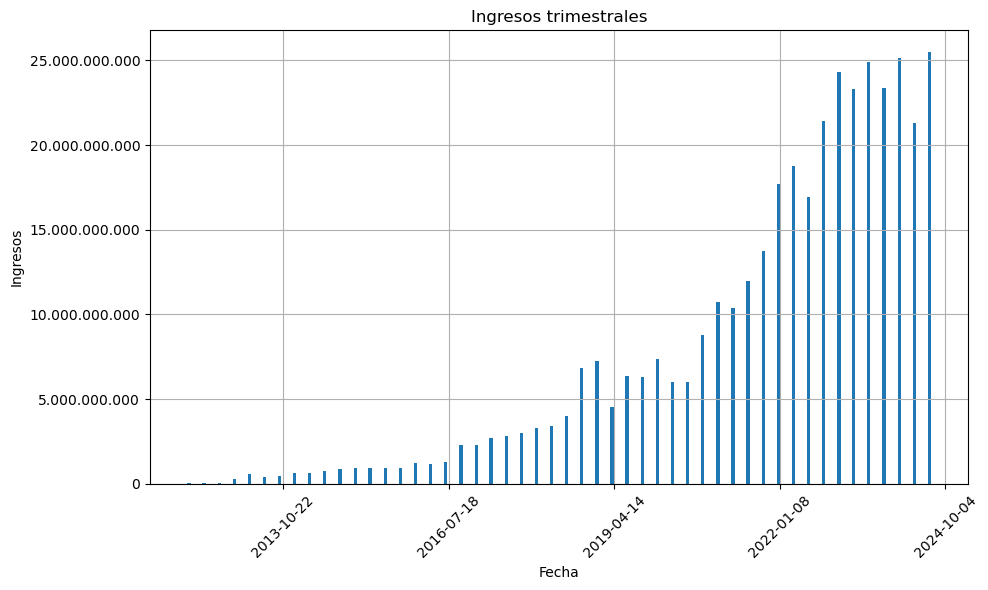

In [85]:
#PASO 6
#Ingresos trimestrales 1\3
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def format_yaxis(value, tick_number):
    return f'{int(value):,}'.replace(',', '.')
plt.figure(figsize=(10, 6))
plt.bar(df_cleaned['Fecha'], df_cleaned['Ingresos'], width=20)
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Ingresos trimestrales')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
#Le damos formato de ceros para representar billones y millones con la misma unidad y no con los 1e6 y 1e9
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
# COnfiguramos el eje X de tal manera que cada barra sera un valor de ingreso por trimestre, en este caso
#tendremos 5 puntos del eje X representados de forma uniforme.
plt.tight_layout()
plt.grid(True) #Esta instruccion crea una rejilla que nos ayuda a ubicar e identificar fallos si los
#valores no centran bien en los ejes
plt.show()

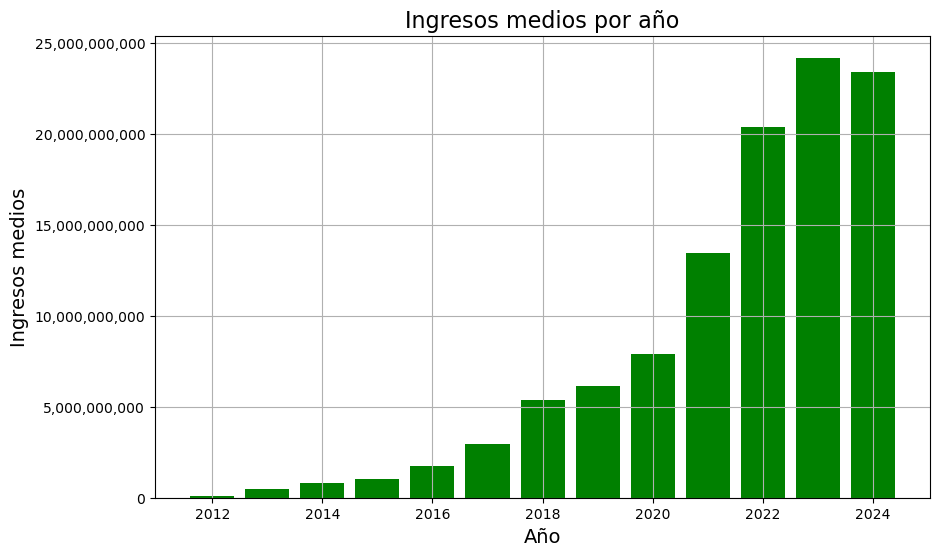

In [83]:
#Paso 6
#Ingresos medios por año. 2\3
#Para poder extraer la media, vamos a tener que crear otra columna, donde la fecha solo sea por años, extraiendola 
#de la columna fecha original
df_cleaned['Anual'] = df_cleaned['Fecha'].dt.year  
# Agrupamos por año y calculamos los ingresos medios
Ingresos_anuales = df_cleaned.groupby('Anual')['Ingresos'].mean().reset_index()
# Almacenamos las medias en una columna nueva para facilitar la creacion del grafico
Ingresos_anuales.columns = ['Year', 'Ingresos_Medios_Anuales']
plt.figure(figsize=(10, 6))
plt.bar(Ingresos_anuales['Year'], Ingresos_anuales['Ingresos_Medios_Anuales'], color='green')
#utilizamos la instruccion siguiente para representar todos los 0's 
#en el eje Y.
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Ingresos medios por año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ingresos medios', fontsize=14)
plt.grid(True)
plt.show()

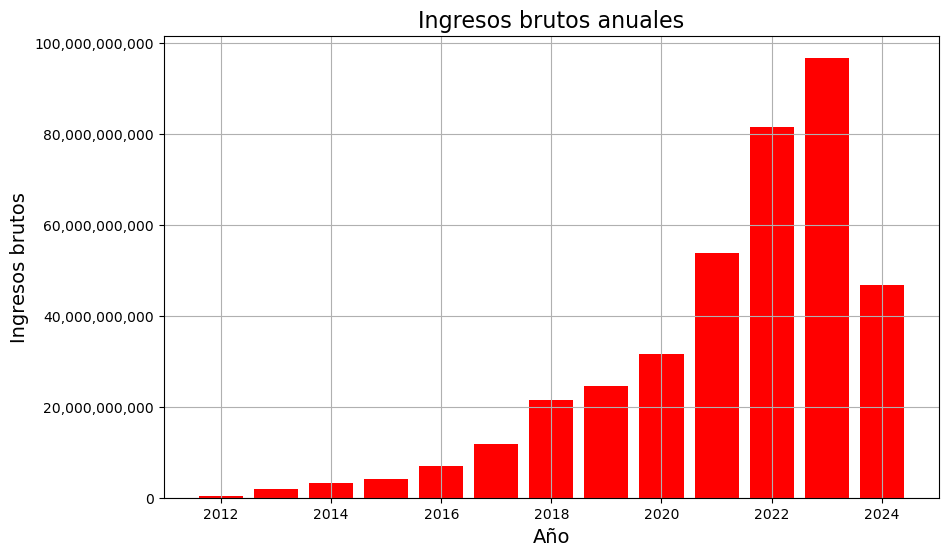

In [84]:
#Paso 6
#Ingresos medios por año. 3\3
# Agrupar por año y calcular los ingresos brutos
Ingresos_Brutos_Anuales = df_cleaned.groupby('Anual')['Ingresos'].sum().reset_index()
Ingresos_Brutos_Anuales.columns = ['Anual', 'Brutos_Anual']
plt.figure(figsize=(10, 6))
plt.bar(Ingresos_Brutos_Anuales['Anual'], Ingresos_Brutos_Anuales['Brutos_Anual'], color='red')
plt.title('Ingresos brutos anuales', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ingresos brutos', fontsize=14)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.show()